In [404]:
import numpy as np
from PIL import Image
from sklearn.feature_extraction import image
import matplotlib.pyplot as plt
import colorsys
from sklearn.cluster import spectral_clustering
import matplotlib.pyplot as plt

Investigate the use of non normalized weights 

In [391]:
border = Image.open('border.jpg')
# Resize image to allow for faster computational time 
order = border.resize((10,10))
borderColor = np.asarray(border)
borderBW = []
for row in borderColor: 
    newRow = []
    for entry in row: 
        # use the hue 
        (h,s,v) = colorsys.rgb_to_hsv(entry[0]/255, entry[1]/255, entry[2]/255)
        #newRow.append(0.3*entry[0] + 0.59*entry[1] + 0.11*entry[2])
        newRow.append(h)
    borderBW.append(np.asarray(newRow))
borderBW = np.asarray(borderBW)

In [393]:
borderMask = np.full(borderBW.shape, True)
# convert to image to graph 
graph = image.img_to_graph(borderBW, mask = borderMask)
# modify the graph such that more similar = smaller weight 
graph.data = np.exp(-graph.data/graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver="arpack")
label_im = np.full(borderMask.shape, -1.0)
label_im[borderMask] = labels

50 50 1
(50, 50, 1)
LOLLL
edges 0 shape(4900,)
edges 1 shape(4900,)
i_idx shape(9800,)
j_idx shape(9800,)
weights shape(4900,)


In [394]:
graph

<2500x2500 sparse matrix of type '<class 'numpy.float64'>'
	with 12300 stored elements in COOrdinate format>

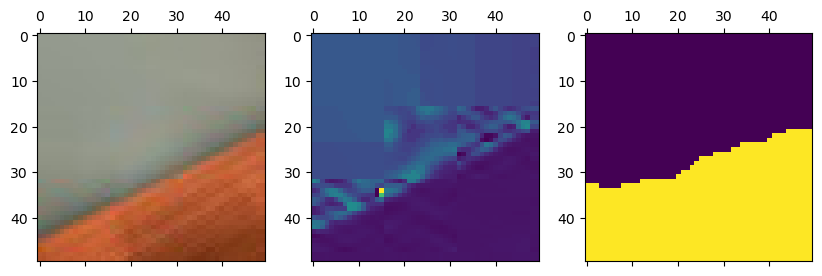

In [395]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
axs[0].matshow(borderColor)
axs[1].matshow(borderBW)
axs[2].matshow(label_im)
plt.show()

In [378]:
# Import images and get black and white and color representation as arrays
coins = Image.open('coins.png')
coinsColor = np.asarray(coins)
coinsBW = []
for row in coinsColor: 
    newRow = []
    for entry in row: 
        newRow.append(0.3*entry[0] + 0.59*entry[1] + 0.11*entry[2])
    coinsBW.append(np.asarray(newRow))
coinsBW = np.asarray(coinsBW)

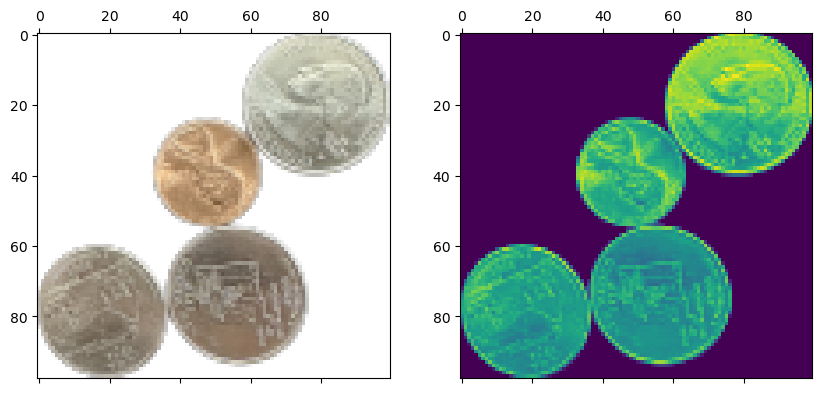

In [379]:
# Display images below
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(coinsColor)
axs[1].matshow(coinsBW)
plt.show()

In [380]:
imgMask = []
for row in coinsColor: 
    newRow = []
    for entry in row: 
        newRow.append(entry[3] > 50)
    imgMask.append(np.asarray(newRow))
imgMask = np.asarray(imgMask)

In [381]:
graph = image.img_to_graph(coinsBW, mask = imgMask)
graph.data = np.exp(-graph.data/graph.data.std())

98 100 1
(98, 100, 1)
LOLLL
edges 0 shape(8758,)
edges 1 shape(8758,)
i_idx shape(17516,)
j_idx shape(17516,)
weights shape(8758,)


In [382]:
labels = spectral_clustering(graph, n_clusters=2, eigen_solver="arpack")
label_im = np.full(imgMask.shape, -1.0)
label_im[imgMask] = labels

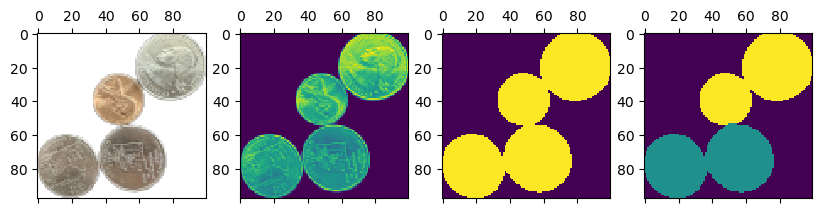

In [383]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))
axs[0].matshow(coinsColor)
axs[1].matshow(coinsBW)
axs[2].matshow(imgMask)
axs[3].matshow(label_im)
plt.show()

Preliminary results generated from only using black and white images to find the min cut. However, this only relies on the difference in value, black and white so it doesn't account for the difference in color. Since the graph's edges are determined by the difference in pixels, instead of looking at difference in value, look at the difference in color, norm of difference. 

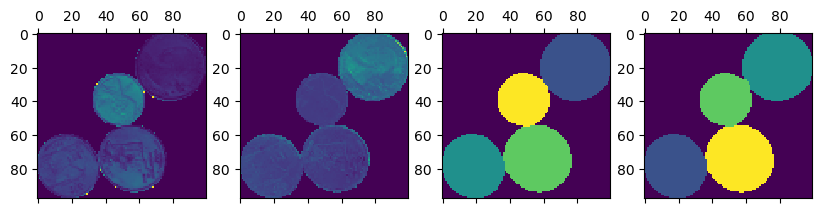

In [319]:

#get only saturation
coinsS = []
coinsH = []
for row in coinsColor: 
    newRowS = []
    newRowH = []
    for entry in row: 
        (h,s,v) = colorsys.rgb_to_hsv(entry[0]/255, entry[1]/255, entry[2]/255)
        newRowS.append(s)
        newRowH.append(h)
    coinsS.append(np.asarray(newRowS))
    coinsH.append(np.asarray(newRowH))
coinsS = np.asarray(coinsS)
coinsH = np.asarray(coinsH)

coinsSGraph = image.img_to_graph(coinsS, mask = imgMask)
coinsHGraph = image.img_to_graph(coinsH, mask = imgMask)
coinsSGraph.data = np.exp(-coinsSGraph.data/graph.data.std())
coinsHGraph.data = np.exp(-coinsHGraph.data/graph.data.std())

labelsS = spectral_clustering(coinsSGraph, n_clusters=4, eigen_solver="arpack")
label_imS = np.full(imgMask.shape, -1.0)
label_imS[imgMask] = labelsS

labelsH = spectral_clustering(coinsHGraph, n_clusters=4, eigen_solver="arpack")
label_imH = np.full(imgMask.shape, -1.0)
label_imH[imgMask] = labelsH

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))
axs[0].matshow(coinsS)
axs[1].matshow(coinsH)
axs[2].matshow(label_imS)
axs[3].matshow(label_imH)
plt.show()

In [320]:
# Generate matrix 
W = np.zeros(shape=(625,625))

In [321]:
# determine the weight matrix, the adjacency matrix 
# only use pixels that are <= euclidean distance away from the current pixel
changes =[]
for x in range(len(borderBW)):
    for y in range(len(borderBW[0])):
        def computeWeight(i, j, a, b): 
            if a >= 0 and a < len(borderBW) and b >= 0 and b < len(borderBW[0]):
                # difference = gradient
                difference = np.abs(borderBW[i][j] - borderBW[a][b])
                W[i*len(borderBW[0])+j][a*len(borderBW[0])+b] = difference
                W[a*len(borderBW[0])+b][i*len(borderBW[0])+j] = difference
        computeWeight(x, y, x+1, y)
        computeWeight(x, y, x, y+1)
        computeWeight(x, y, x-1, y)
        computeWeight(x, y, x, y-1)

In [308]:
stdDev = np.std(W)
for x in range(len(W)):
    for y in range(len(W[0])):
        W[x][y] = np.exp(-1*W[x][y]/stdDev)

In [309]:
D = np.diag(W.sum(axis=1))

In [310]:
labels = spectral_clustering(W, n_clusters=2, eigen_solver="arpack")
label_im = np.full(borderMask.shape, -1.0)
label_im[borderMask] = labels

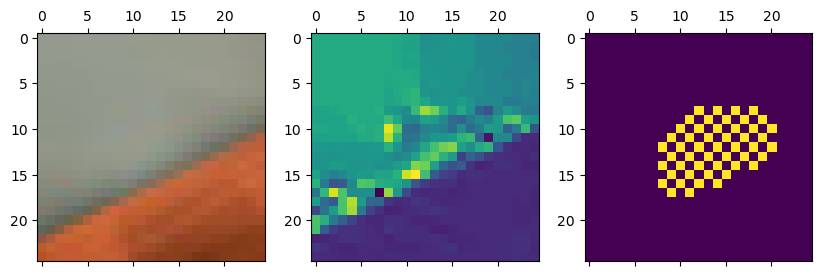

In [311]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
axs[0].matshow(borderColor)
axs[1].matshow(borderBW)
axs[2].matshow(label_im)
plt.show()

Attempt at using own img_to_graph function implementation, does a poor job at detecting the cluster compared with the method provided in sklearn 



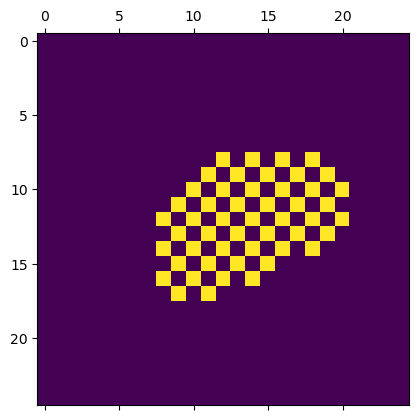

In [312]:
L = D-W
# eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(L)


# sort these based on the eigenvalues
eigvecs = eigvecs[:,np.argsort(eigvals)]
eigvals = eigvals[np.argsort(eigvals)]

# cast to real
eigvals = np.real(eigvecs)

# kmeans on first three vectors with nonzero eigenvalues
kmeans = KMeans(n_clusters=2)
kmeans.fit(vecs[:,1:2])
colors = kmeans.labels_

colors = np.array_split(colors, 25)
plt.matshow(colors)

Since this plot is the same as when we used the spectral_clustering method, the issue lies in the way the adjacency matrix is computed. Look at other ways to compute the gradient, instead of mapping image to 2d space, compute gradient based on color difference. 

In [418]:
# modify the to graph function 
from scipy import sparse
def _new_to_graph(
    n_x, n_y, n_z, mask=None, img=None, return_as=sparse.coo_matrix, dtype=None
):
    """Auxiliary function for img_to_graph and grid_to_graph"""
    edges = image._make_edges_3d(n_x, n_y, n_z)
    print('{0} {1} {2}'.format(n_x, n_y, n_z))
    if dtype is None:
        if img is None:
            dtype = int
        else:
            dtype = img.dtype

    if img is not None:
        img = np.atleast_3d(img)
        weights = image._compute_gradient_3d(edges, img)
        if mask is not None:
            edges, weights = image._mask_edges_weights(mask, edges, weights)
            diag = img.squeeze()[mask]
        else:
            diag = img.ravel()
        n_voxels = diag.size
    else:
        if mask is not None:
            mask = mask.astype(dtype=bool, copy=False)
            mask = np.asarray(mask, dtype=bool)
            edges = _mask_edges_weights(mask, edges)
            n_voxels = np.sum(mask)
        else:
            n_voxels = n_x * n_y * n_z
        weights = np.ones(edges.shape[1], dtype=dtype)
        diag = np.ones(n_voxels, dtype=dtype)

    diag_idx = np.arange(n_voxels)
    print("diag_idx shape " + str(diag_idx.shape))
    print("edges 0 shape" + str(edges[0].shape))
    print("edges 1 shape" + str(edges[1].shape))
    i_idx = np.hstack((edges[0], edges[1]))
    print("i_idx shape" + str(i_idx.shape))
    j_idx = np.hstack((edges[1], edges[0]))
    print("j_idx shape" + str(j_idx.shape))
    print("weights shape" + str(weights.shape))
    graph = sparse.coo_matrix(
        (
            np.hstack((weights, weights, diag)),
            (np.hstack((i_idx, diag_idx)), np.hstack((j_idx, diag_idx))),
        ),
        (n_voxels, n_voxels),
        dtype=dtype,
    )
    if return_as is np.ndarray:
        return graph.toarray()
    return return_as(graph)

In [419]:
def _new_compute_gradient_3d(edges, img):
    _, n_y, n_z = img.shape
    print(img.shape)
    gradient = np.abs(
        img[
            edges[0] // (n_y * n_z),
            (edges[0] % (n_y * n_z)) // n_z,
            (edges[0] % (n_y * n_z)) % n_z,
        ]
        - img[
            edges[1] // (n_y * n_z),
            (edges[1] % (n_y * n_z)) // n_z,
            (edges[1] % (n_y * n_z)) % n_z,
        ]
        
    )
    return gradient


image._compute_gradient_3d = _new_compute_gradient_3d
image._to_graph = _new_to_graph

graph = image.img_to_graph(np.atleast_3d(borderBW), mask = borderMask)

50 50 1
(50, 50, 1)
diag_idx shape (2500,)
edges 0 shape(4900,)
edges 1 shape(4900,)
i_idx shape(9800,)
j_idx shape(9800,)
weights shape(4900,)


In [420]:
# split the RGB channels 
borderR = []
borderG = []
borderB= []
for row in borderColor: 
    newRowR = []
    newRowG = []
    newRowB = []
    for entry in row: 
        newRowR.append(entry[0]/255)
        newRowG.append(entry[1]/255)
        newRowB.append(entry[2]/255)
    borderR.append(np.asarray(newRowR))
    borderG.append(np.asarray(newRowG))
    borderB.append(np.asarray(newRowB))
borderR = np.asarray(borderR)
borderG = np.asarray(borderG)
borderB = np.asarray(borderB)

In [421]:
graphR = image.img_to_graph(borderR, mask = borderMask)
graphG = image.img_to_graph(borderG, mask = borderMask)
graphB = image.img_to_graph(borderB, mask = borderMask)

graph = np.sqrt(np.square(graphR) + np.square(graphG) + np.square(graphB))
graph.data = np.exp(-graph.data/graph.data.std())

50 50 1
(50, 50, 1)
diag_idx shape (2500,)
edges 0 shape(4900,)
edges 1 shape(4900,)
i_idx shape(9800,)
j_idx shape(9800,)
weights shape(4900,)
50 50 1
(50, 50, 1)
diag_idx shape (2500,)
edges 0 shape(4900,)
edges 1 shape(4900,)
i_idx shape(9800,)
j_idx shape(9800,)
weights shape(4900,)
50 50 1
(50, 50, 1)
diag_idx shape (2500,)
edges 0 shape(4900,)
edges 1 shape(4900,)
i_idx shape(9800,)
j_idx shape(9800,)
weights shape(4900,)


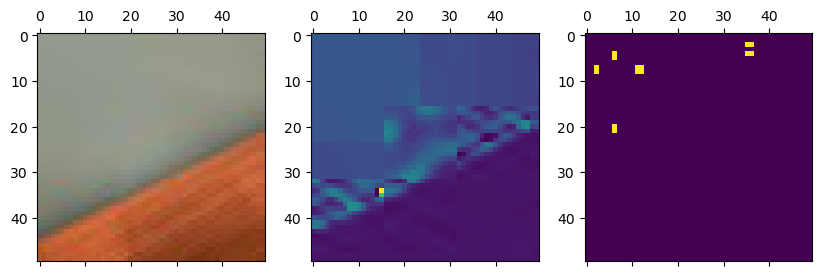

In [412]:
labels = spectral_clustering(graphR, n_clusters=2, eigen_solver="arpack")
label_im = np.full(borderMask.shape, -1.0)
label_im[borderMask] = labels

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
axs[0].matshow(borderColor)
axs[1].matshow(borderBW)
axs[2].matshow(label_im)
plt.show()

In [411]:


stdDev = np.std(W)
print(stdDev)
for x in range(len(W)):
    for y in range(len(W[0])):
        W[x][y] = np.exp(-1*W[x][y]/stdDev)
L = D - W

eigva, eigve = np.linalg.eig(L)
# only care about first two eigve 


#print(eigve)
print(eigva)
eigva = np.real(eigva)

from sklearn.cluster import KMeans
X = np.array([eigve[98], eigve[95]])
X = X.transpose()
print(X)
kmeans = KMeans(n_clusters=2, random_state=0, init="random").fit(X)
print(kmeans.labels_)

0.05474072828575478
[617.44041287+0.00000000e+00j 617.53279628+0.00000000e+00j
 617.75433911+0.00000000e+00j 617.88421422+0.00000000e+00j
 617.89154996+0.00000000e+00j 617.89662065+0.00000000e+00j
 617.96102409+0.00000000e+00j 618.08296257+0.00000000e+00j
 618.09229903+0.00000000e+00j 618.14001665+0.00000000e+00j
 618.20217204+0.00000000e+00j 618.24991917+0.00000000e+00j
 618.3819656 +0.00000000e+00j 618.40896134+0.00000000e+00j
 618.48403056+0.00000000e+00j 618.558052  +0.00000000e+00j
 618.64753554+0.00000000e+00j 618.67956807+0.00000000e+00j
 618.69859112+0.00000000e+00j 618.76494461+0.00000000e+00j
 618.83634031+0.00000000e+00j 618.88623444+0.00000000e+00j
 618.90359639+0.00000000e+00j 618.96634239+0.00000000e+00j
 618.99384097+0.00000000e+00j 619.02235862+0.00000000e+00j
 619.0554258 +0.00000000e+00j 619.12141552+0.00000000e+00j
 619.19092264+0.00000000e+00j 619.27632877+0.00000000e+00j
 619.26702466+0.00000000e+00j 619.34429766+0.00000000e+00j
 619.3960016 +0.00000000e+00j 619.43

ValueError: Complex data not supported
[[ 1.40047814e-08+0.j  1.28947138e-08+0.j]
 [ 3.94370665e-09+0.j  3.62724629e-09+0.j]
 [-6.05989122e-09+0.j -5.55875151e-09+0.j]
 ...
 [ 4.64249670e-13+0.j -3.12094911e-02+0.j]
 [ 2.19612925e-13+0.j -5.55362197e-02+0.j]
 [ 1.12845675e-13+0.j -7.08710261e-02+0.j]]


In [245]:
import scipy as sp

L = [[ 2., -6., 0., 0.], 
     [-6.,  2., 0., 0.], 
     [0., 0.,  2., -6.], 
     [0., 0., -6.,  2.]]
L = np.array(L)

L = np.exp(-L/(L.std()))
print(L)
# compute eigenvectors 
eigva, eigve = sp.linalg.eig(L)
# only care about first two eigve 
print(eigva)
print(eigve)
from sklearn.cluster import KMeans
X = np.array([eigve[0],eigve[1]])
X = X.transpose()

kmeans = KMeans(n_clusters=2, random_state=0, init="random").fit(X)
kmeans.labels_

[[0.51341712 7.3890561  1.         1.        ]
 [7.3890561  0.51341712 1.         1.        ]
 [1.         1.         0.51341712 7.3890561 ]
 [1.         1.         7.3890561  0.51341712]]
[-6.87563898+0.j  5.90247322+0.j  9.90247322+0.j -6.87563898+0.j]
[[ 7.07106781e-01 -5.00000000e-01 -5.00000000e-01  1.00783601e-01]
 [-7.07106781e-01 -5.00000000e-01 -5.00000000e-01 -1.00783601e-01]
 [ 1.38390475e-17  5.00000000e-01 -5.00000000e-01 -6.99887609e-01]
 [ 1.38390475e-17  5.00000000e-01 -5.00000000e-01  6.99887609e-01]]


array([0, 1, 1, 1], dtype=int32)

In [ ]:
L = np.zeros(shape=(100,100))
#L = np.subtract(D, W)
for x in range((100)):
    for y in range((100)):
        L[x][y] = D[x][y]- W[x][y]


labels = spectral_clustering(L, n_clusters=2, eigen_solver="arpack")
label_im = np.full(borderMask.shape, -1.0)
label_im[borderMask] = labels

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
axs[0].matshow(borderColor)
axs[1].matshow(borderBW)
axs[2].matshow(label_im)
plt.show()

ignore stuff above 
Since the imgToGraph only works with non 1D data, rewrite to work with multiple  